<a href="https://colab.research.google.com/github/Loulou-lepou/AppliedMathModeling1/blob/master/Spline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cubic Spline Interpolation Practice
© coded by Louloulepou, last edit 7/2/23

# Spline 

[Ref link: PreCalculus ](https://faculty.ksu.edu.sa/sites/default/files/precalculus-mathematics_for_calculus-j._stewart_l._redlin_and_s._watson-cengage_learning_7th_edition_2015.pdf)

$ \text{data points} = [(0, 0), (1, 1), (2, 4), (3, 3)] \\
\displaystyle S(x) = 
\begin{cases} 
\displaystyle \frac{4}{5}x^3 + \frac{1}{5}x & 0 \leq x\leq 1 \\
\displaystyle -2x^3 + \frac{42}{5}x^2 - \frac{41}{5}x + \frac{14}{5} & 1\leq x\leq 2 \\
\displaystyle \frac{6}{5}x^3 - \frac{54}{5}x^2 + \frac{151}{5}x - \frac{114}{5} & \textit{otherwise} 
\end{cases} \\ \\
\underbrace{S(x)}_{\textit{piecewise polynomial}} \in \underbrace{C^{2}([0, 3])}_{\tiny{\textbf{twice continuously differentiable}}}
$ 

<font color='green'>Every 2 adjacent polynomial pieces meet in their value and first $(n - 1)$ derivatives at each knot.</font>

## Natural Cubic Spline 
$ S_{i}(x) = a_{i}x^3 + b_{i}x^2+c_{i}x + d_{i}, \quad 0 \leq i \leq 2 \\ 
S'_{i}(x) = 3a_{i}x^2 + 2b_{i}x + c_i \\
S''_{i}(x) = 6a_{i}x + 2b_{i} \\
\\
\color{red}{S_{0}(0)=0 \Rightarrow d_{0} = 0} \\
\Rightarrow 
\begin{pmatrix} 
0&0 &0 & \color{red}{1} & 0& 0& 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
\cdot 
\begin{pmatrix} 
a_{0}&b_{0} &c_{0} & \color{red}{d_{0}} & a_{1}& b_{1}& c_{1} & d_{1} & a_{2} & b_{2} & c_{2} & d_{2}
\end{pmatrix} ^{T} = \color{red}{0}\\
\rule{25cm}{0.4pt}\\
\color{red}{S_{0}(1)=1} \Rightarrow a_{0}\cdot 1^3+ b_{0} \cdot 1^2+c_{0} \cdot 1+d_{0} =1 \Rightarrow \color{red}{ a_{0} + b_{0}+c_{0}+d_{0} = 1} \\
\Rightarrow 
\begin{pmatrix} 
\color{red}{1}&\color{red}{1} &\color{red}{1} & \color{red}{1} & 0& 0& 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} 
\cdot 
\begin{pmatrix} 
\color{red}{a_{0}}&\color{red}{b_{0}} &\color{red}{c_{0}} &\color{red}{ d_{0}} & a_{1}& b_{1}& c_{1} & d_{1} & a_{2} & b_{2} & c_{2} & d_{2}
\end{pmatrix} ^{T} = \color{red}{1}\\
\rule{25cm}{0.4pt}
$

Therefore, we have the following system of linear equations in matrix form:

$\displaystyle \begin{pmatrix} 
&&&1&&&&&&&&\\
1&1&1&1&&&&&&&&\\
&&&&1&1&1&1&&&&\\
&&&&8&4&2&1&&&&\\
&&&&&&&&8&4&2&1\\
&&&&&&&&27&9&3&1\\
3&2&1&&-3&-2&-1&&&&&\\
&&&&12&4&1&&-12&-4&-1&\\
&2&&&&&&&&&&\\
6&2&&&-6&-2&&&&&&\\
&&&&12&2&&&-12&-2&&\\
&&&&&&&&18&2&&
\end{pmatrix} \cdot 
\begin{pmatrix}
a_{0} \\ b_{0} \\ c_{0} \\ d_{0}\\
a_{1}\\ b_{1} \\ c_{1} \\ d_{1} \\
a_{2} \\ b_{2} \\ c_{2} \\ d_{2}
\end{pmatrix} = \displaystyle 
\begin{pmatrix}
0 \\ 1 \\ 1 \\ 4\\
4\\ 3 \\ 0 \\ 0 \\
0\\ 0 \\ 0 \\ 0
\end{pmatrix} 
$




# Maple code


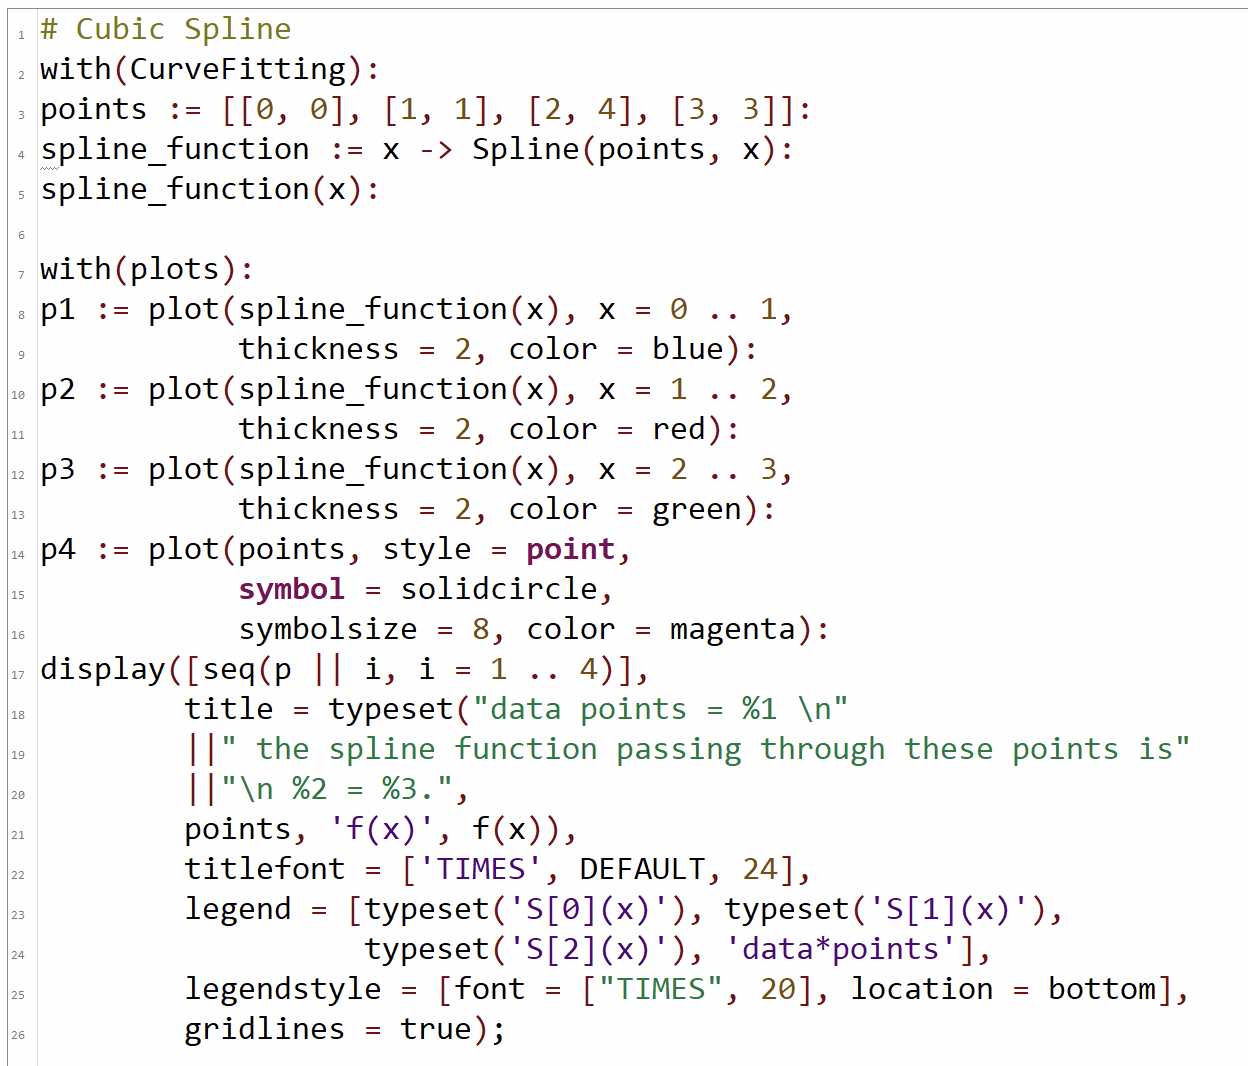

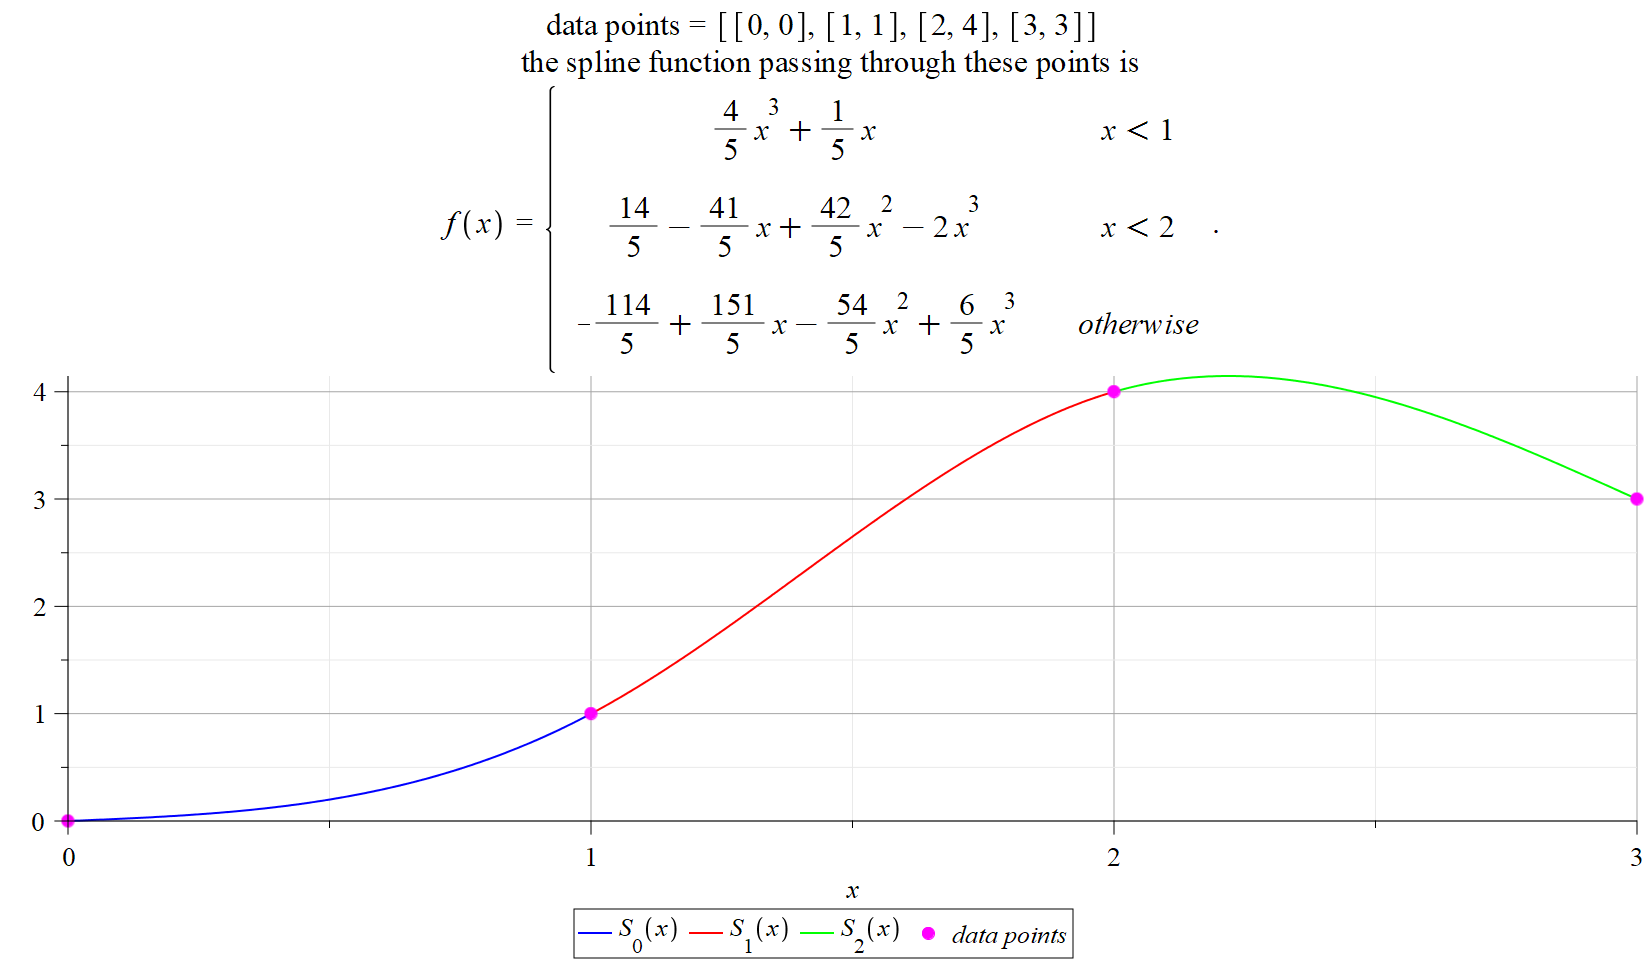

## 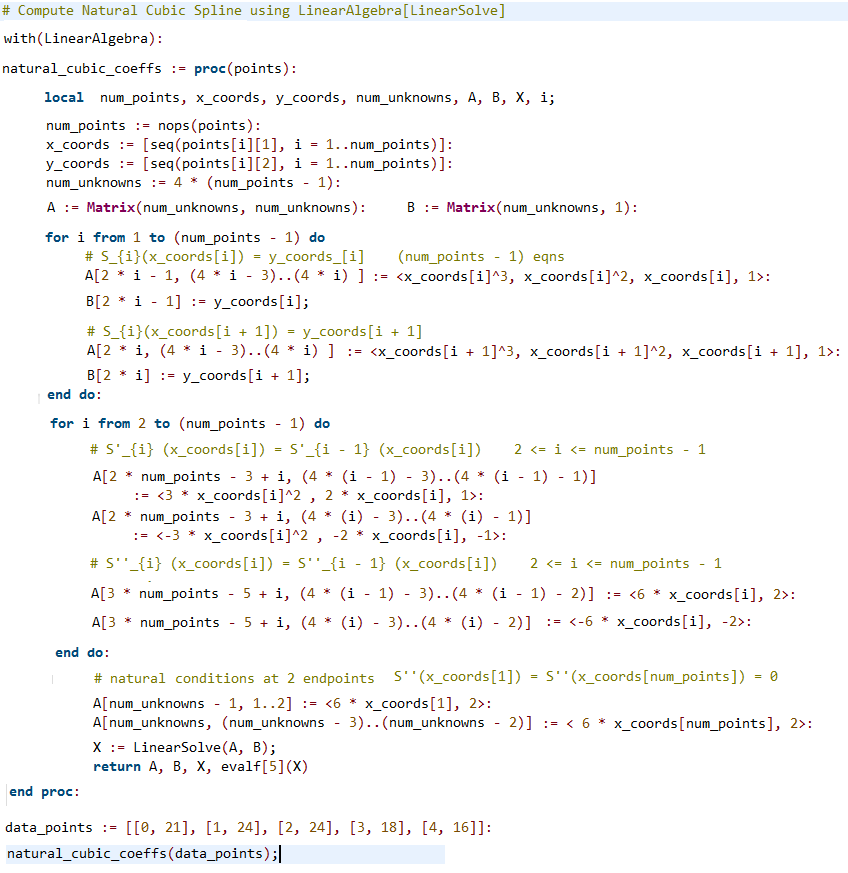

## 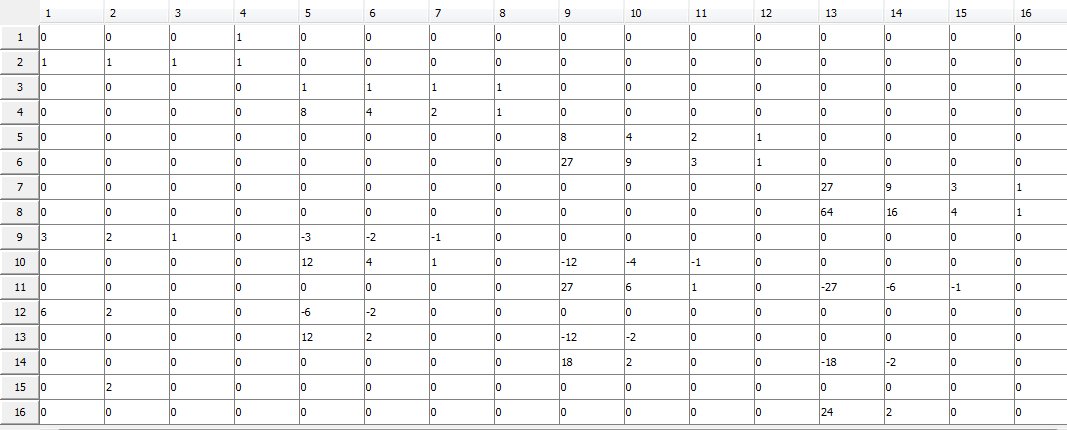

## 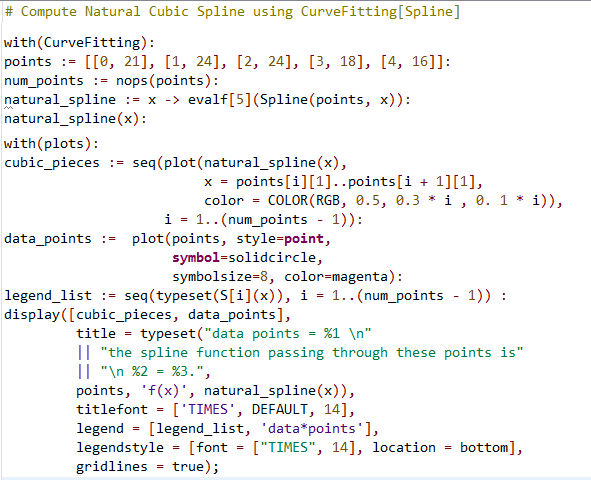

## 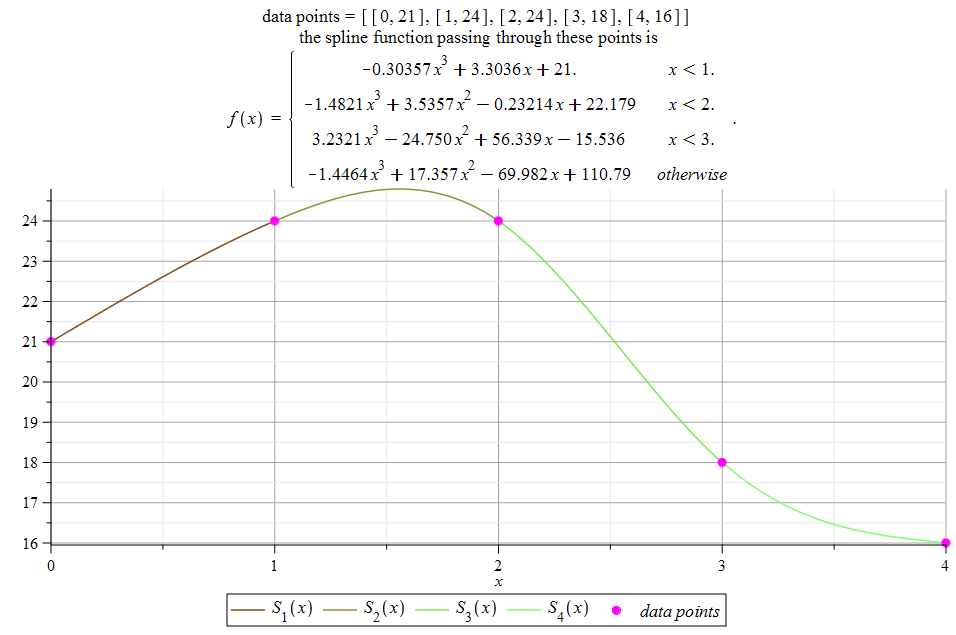

# Application of cubic splines

Here, in GGB, we use the **right-hand rule for curve direction**




In [ ]:
import IPython
IPython.display.HTML('<iframe src="https://www.geogebra.org/classic/y6cxyvkc?embed" width="1000" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>')

In [ ]:
IPython.display.HTML('<iframe src="https://www.geogebra.org/classic/jwgkurfj?embed" width="1200" height="600" allowfullscreen style="border: 1px solid #e4e4e4;border-radius: 4px;" frameborder="0"></iframe>')

# Plot with Python

In [ ]:
import numpy as np


row_zeros = [0 for _ in range(12)]
mat_A = np.array([row_zeros for _ in range(12)])
mat_A[0,3]= 1
mat_A[1, :4] = 1
mat_A[2, 4:8] = 1
mat_A[3, 4:8] = [8, 4, 2, 1]
mat_A[4, 8:12] = [8, 4, 2, 1]
mat_A[5, 8:12] = [27, 9, 3, 1]
mat_A[6, :7] = [3, 2, 1, 0, -3, -2, -1]
mat_A[7, 4:11] = [12, 4, 1, 0, -12, -4, -1]
mat_A[8, 2] = 2
mat_A[9, :6] = [6, 2, 0, 0, -6, -2]
mat_A[10, 4:10] = [12, 2, 0, 0, -12, -2]
mat_A[11, 8:10] = [12, 2]
mat_A


array([[  0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   1,   1,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   8,   4,   2,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,   4,   2,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,  27,   9,   3,   1],
       [  3,   2,   1,   0,  -3,  -2,  -1,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  12,   4,   1,   0, -12,  -4,  -1,   0],
       [  0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  6,   2,   0,   0,  -6,  -2,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  12,   2,   0,   0, -12,  -2,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12,   2,   0,   0]])